In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [3]:
image_path = "../output_videos/cropped_image.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

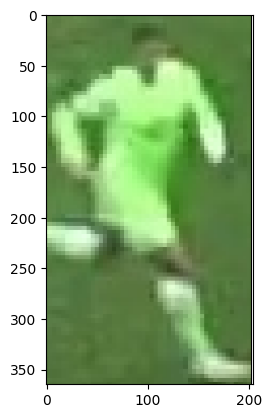

In [4]:
plt.imshow(image)
plt.show()

## Take the top half of the image

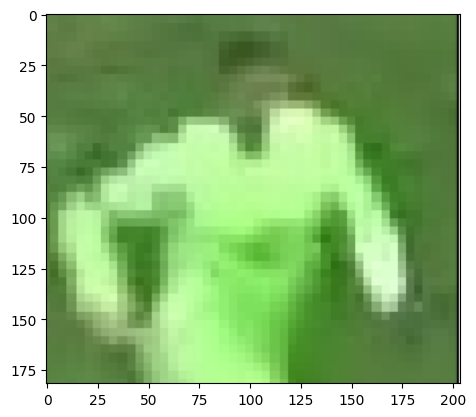

In [15]:
top_half_img = image[0: int(image.shape[0]/2)]
plt.imshow(top_half_img)
plt.show()

## Cluster the image into 2 clusters

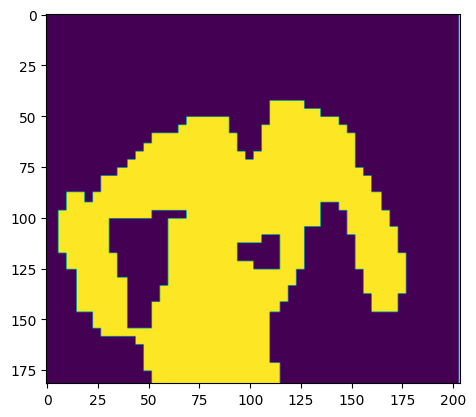

In [31]:
#reshape the image into 2d array
image_2d = top_half_img.reshape(-1,3) #-1 the first two dimensions (height and width) into one dimension

# perform k-means clustering with 2 clusters
kmeans = KMeans(n_clusters=2, random_state=0)
kmeans.fit(image_2d)

# get the cluster labels
labels = kmeans.labels_

# reshape the labels into the orginal image shape
clustered_image = labels.reshape(top_half_img.shape[0], top_half_img.shape[1])

plt.imshow(clustered_image)
plt.show()

# Get the color of the player

In [34]:
# We will take the corners labels bc there is a high prob that corners are backgrounds
corner_clusters = [clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_cluster = max(set(corner_clusters),key=corner_clusters.count)
player_cluster = 1-non_player_cluster
#get the color RGB of the player
kmeans.cluster_centers_[player_cluster]

array([172.2412194 , 235.53687091, 144.0935837 ])